# Readability and Style Analysis
This notebook compares emails from Katrina Armstrong and Minouche Shafik by calculating text readability and writing style metrics using the Flesch-Kincaid Grade Level and average sentence/word lengths.

In [39]:
import pandas as pd

# Load data
df_katrina = pd.read_excel("Katrina.xlsx")
df_minouche = pd.read_excel("Minouche.xlsx")

# Preview
#df_katrina.head(), df_minouche.head()

In [40]:
import textstat

# Drop missing values and convert to list
katrina_texts = df_katrina['Content'].dropna().tolist()
minouche_texts = df_minouche['Content'].dropna().tolist()

# Function to compute readability stats
def compute_stats(texts):
    return {
        "flesch_kincaid_grade_level": sum(textstat.flesch_kincaid_grade(text) for text in texts) / len(texts),
        "flesch_reading_ease": sum(textstat.flesch_reading_ease(text) for text in texts) / len(texts),
        "avg_sentence_length": sum(textstat.avg_sentence_length(text) for text in texts) / len(texts),
        "avg_syllables_per_word": sum(textstat.avg_syllables_per_word(text) for text in texts) / len(texts),
        "avg_letter_per_word": sum(textstat.avg_letter_per_word(text) for text in texts) / len(texts)
    }

# Calculate stats
katrina_stats = compute_stats(katrina_texts)
minouche_stats = compute_stats(minouche_texts)

# Combine results
readability_df = pd.DataFrame([katrina_stats, minouche_stats], index=["Katrina", "Minouche"])
readability_df

,flesch_kincaid_grade_level,flesch_reading_ease,avg_sentence_length,avg_syllables_per_word,avg_letter_per_word
Katrina,14.792857,32.468214,24.439286,1.767857,5.130714
Minouche,13.864706,36.660000,23.023529,1.735294,5.036471


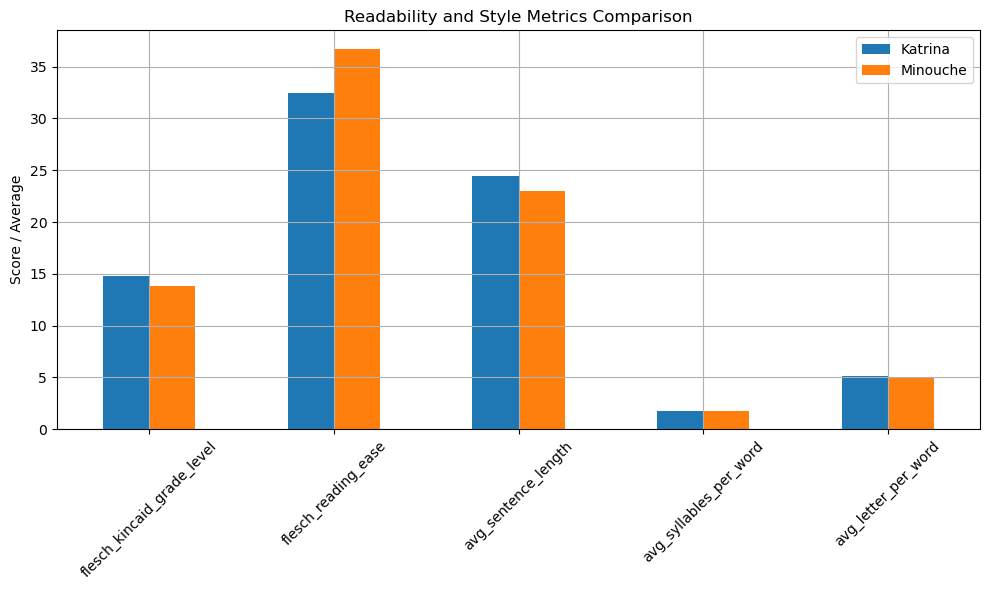

In [41]:
import matplotlib.pyplot as plt

readability_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Readability and Style Metrics Comparison")
plt.ylabel("Score / Average")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Running Flesch-Kincaid test on my own piece

In [42]:
# Read file
with open("Uni_president_piece.sty", "r", encoding="utf-8") as f:
    text = f.read()

# Compute readability statistics using the same method
readability_stats = {
    "flesch_kincaid_grade_level": textstat.flesch_kincaid_grade(text),
    "flesch_reading_ease": textstat.flesch_reading_ease(text),
    "avg_sentence_length": textstat.avg_sentence_length(text),
    "avg_syllables_per_word": textstat.avg_syllables_per_word(text),
    "avg_letter_per_word": textstat.avg_letter_per_word(text)
}

# Display as a DataFrame
my_readability = pd.DataFrame([readability_stats], index=["Emma"])
my_readability


,flesch_kincaid_grade_level,flesch_reading_ease,avg_sentence_length,avg_syllables_per_word,avg_letter_per_word
Emma,12.2,42.82,19.9,1.7,5.18


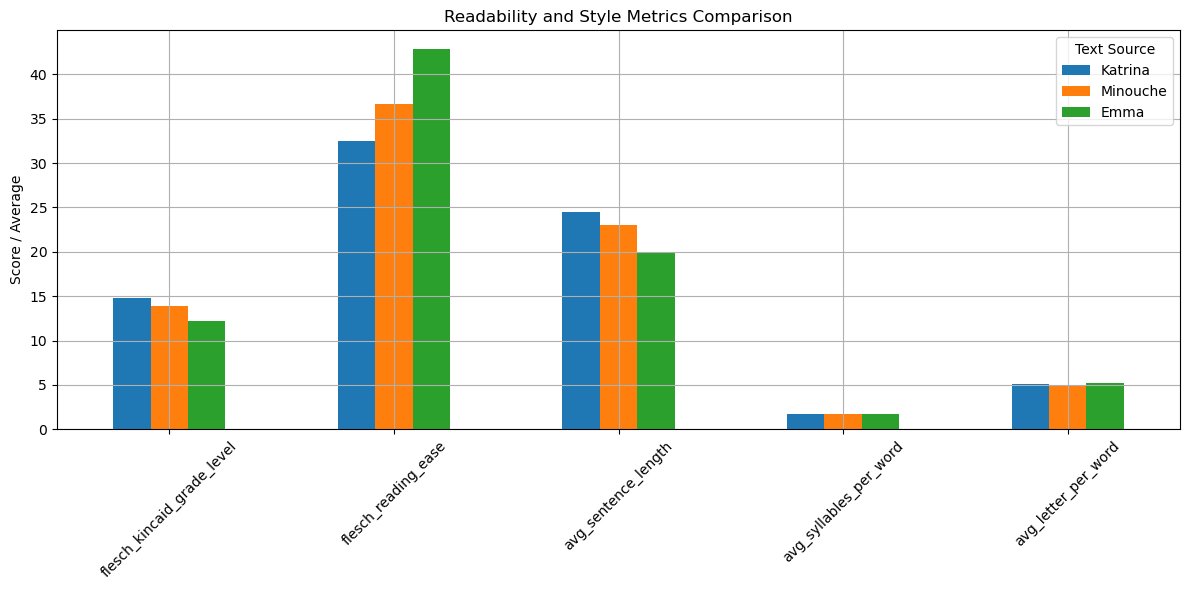

In [43]:
# Combine all readability data into a single DataFrame
combined_df = pd.concat([readability_df, my_readability])
combined_df.head()

# Plot all three on the same graph
combined_df.T.plot(kind='bar', figsize=(12, 6))
plt.title("Readability and Style Metrics Comparison")
plt.ylabel("Score / Average")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Text Source")
plt.show()
